MNIST Classifier

In [1]:
pip install emnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Imports
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from emnist import extract_training_samples
from emnist import extract_test_samples
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, 
    MaxPool2D, 
    Dense, 
    Flatten, 
    Dropout,
    BatchNormalization,
    Input
)   
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.losses import sparse_categorical_crossentropy

2024-02-19 16:42:06.297151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 16:42:06.297268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 16:42:06.462458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading the Data

In [3]:
#Loading the MNIST data
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)


#CNN
x_train2 = x_train.reshape(x_train.shape[0], 28,28,1)
x_test2 = x_test.reshape(x_test.shape[0],28,28,1)


11490434/11490434 [==============================] - 0s 0us/step


EMNIST Dataset

In [4]:
em_train, em_train_labels = extract_training_samples('digits')
em_test, em_test_labels = extract_test_samples('digits')

em_train = em_train.astype('float32')
em_train /= 255
em_test = em_test.astype('float32')
em_test /= 255

em_train_labels1 = to_categorical(em_train_labels,10)

#CNN
em_train2 = em_train.reshape(em_train.shape[0],28,28,1)
em_test2 = em_test.reshape(em_test.shape[0],28,28,1)


Merged Dataset

In [5]:
input_train = np.concatenate((x_train2, em_train2), axis = 0)
target_train = np.concatenate((y_train,em_train_labels1), axis = 0)


input_test = np.concatenate((x_test2, em_test2), axis = 0)
target_test = np.concatenate((labels_test,em_test_labels), axis = 0)


Data Augmentation

In [6]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.08),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
    ])

Model using other method

In [7]:
inputs = Input(shape=x_train2.shape[1:])
x = data_aug(inputs)
x = Conv2D(filters=64, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=64, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.4)(x)
outputs = Dense(10, activation='softmax')(x)
net = Model(inputs=inputs, outputs=outputs)

Training

In [8]:
net.compile(loss='categorical_crossentropy', optimizer='adam')
history_net = net.fit(input_train, target_train, validation_split=0.1, epochs=20, batch_size=256)

Epoch 1/20


I0000 00:00:1708360959.133756      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1055/1055 [==============================] - 17s 10ms/step - loss: 0.1250 - val_loss: 0.0482
Epoch 2/20
1055/1055 [==============================] - 10s 9ms/step - loss: 0.0494 - val_loss: 0.0539
Epoch 3/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0420 - val_loss: 0.0315
Epoch 4/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0364 - val_loss: 0.0404
Epoch 5/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0340 - val_loss: 0.0497
Epoch 6/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0318 - val_loss: 0.0282
Epoch 7/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0311 - val_loss: 0.0371
Epoch 8/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0284 - val_loss: 0.0267
Epoch 9/20
1055/1055 [==============================] - 9s 9ms/step - loss: 0.0275 - val_loss: 0.0265
Epoch 10/20
1055/1055 [==============================] - 10s 9ms/step - loss: 0.0276 - val

Model summary

In [9]:
net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                        

Plotting

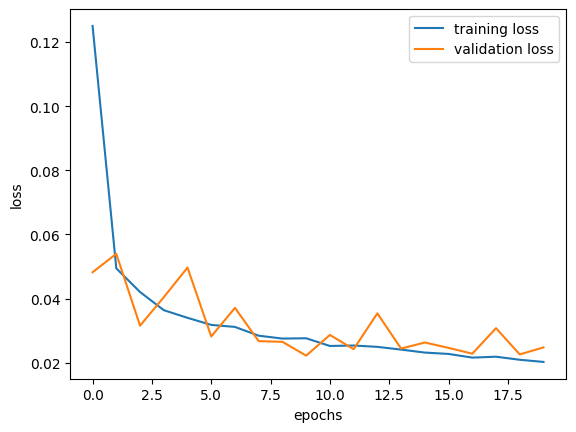

In [10]:
plt.figure()
plt.plot(history_net.history['loss'], label='training loss')
plt.plot(history_net.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Testing

In [11]:
#MNIST
outputs_net=net.predict(x_test2)
labels_predicted_net = np.argmax(outputs_net, axis=1)
misclassified_net=sum(labels_predicted_net!=labels_test)
classified_net = sum(labels_predicted_net == labels_test)
print('Percentage misclassified = ',100*misclassified_net/labels_test.size)
print('Perecentage correctly classified = ', 100*classified_net/labels_test.size)


#EMNIST
#CNN percentage misclassified = 
outputs1_net = net.predict(em_test2)
labels_predicted1_net = np.argmax(outputs1_net, axis=1)
misclassified1_net = sum(labels_predicted1_net!= em_test_labels)
classified1_net = sum(labels_predicted1_net == em_test_labels)
print('Percentage misclassified = ',100*misclassified1_net/em_test_labels.size)
print('Perecentage correctly classified = ', 100*classified1_net/em_test_labels.size)



#Merged
outputs2_net=net.predict(input_test)
labels_predicted2_net = np.argmax(outputs2_net, axis=1)
misclassified2_net=sum(labels_predicted2_net!=target_test)
classified2_net = sum(labels_predicted2_net == target_test)
print('Percentage misclassified = ',100*misclassified2_net/target_test.size)
print('Perecentage correctly classified = ', 100*classified2_net/target_test.size)



313/313 [==============================] - 1s 2ms/step
Percentage misclassified =  0.68
Perecentage correctly classified =  99.32
1250/1250 [==============================] - 2s 2ms/step
Percentage misclassified =  0.4575
Perecentage correctly classified =  99.5425
1563/1563 [==============================] - 3s 2ms/step
Percentage misclassified =  0.502
Perecentage correctly classified =  99.498


In [12]:
net.save("network_for_mnist_cnn_v9.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
